[512, 512]
dict_keys([0, (0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 0, 5), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 0, 5), (2, 0, 6), (2, 0, 7), (2, 0, 8), (2, 0, 9), (2, 0, 10), (2, 0, 11), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 1, 5), (2, 1, 6), (2, 1, 7), (2, 1, 8), (2, 1, 9), (2, 1, 10), (2, 1, 11)])
4.9491257655853715e-05


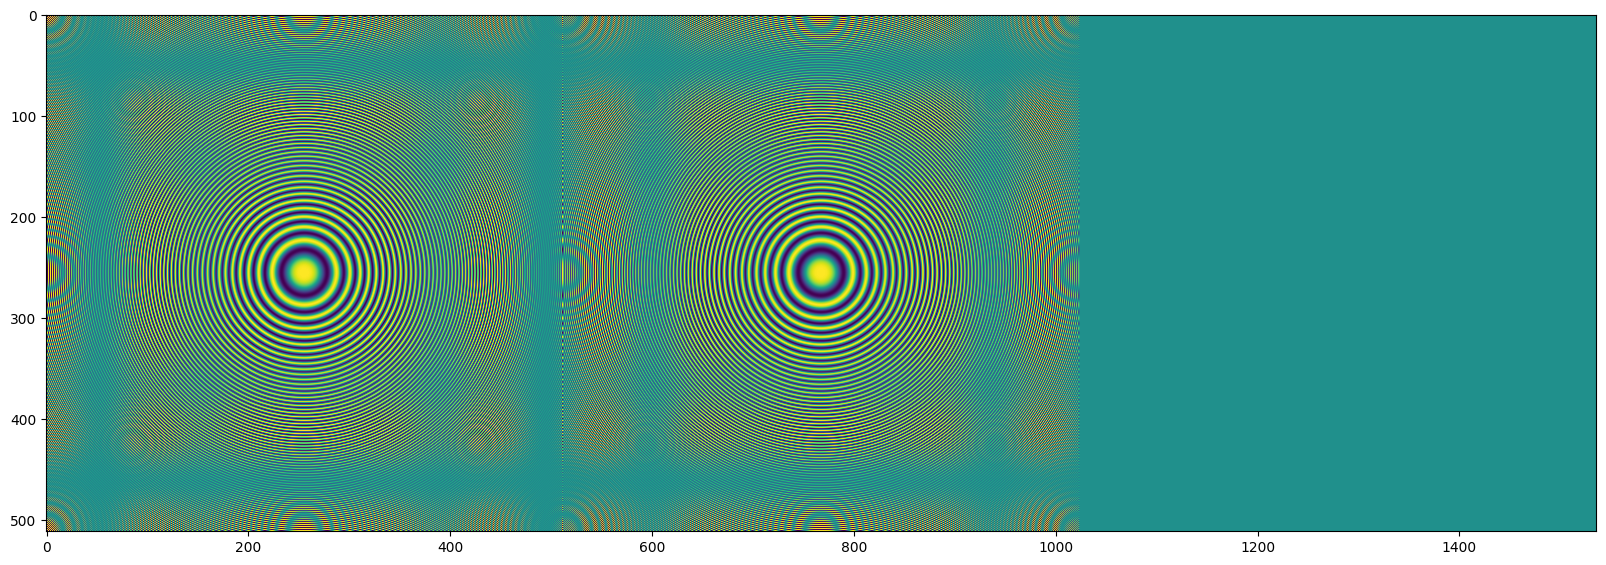

In [1]:
from ucurv import *
from zoneplate import *

sz = [512, 512]
cfg = [[3, 3], [6,6], [12, 12]]

print(sz)
rsq = zoneplate(sz)
img = rsq - np.mean(rsq)
# plt.imshow(img)

udct = ucurv(sz, cfg)

imband = ucurvfwd(img, udct)
print(imband.keys())
recon = ucurvinv(imband, udct)

err = img - recon
print(np.max(np.abs(err)))
plt.figure(figsize = (20, 60))

plt.imshow(np.concatenate((img, recon, err), axis = 1))

In [ ]:
sz = [64, 96, 128]
cfg = [[3, 3, 3], [6, 6, 6]]
print(sz)
rsq = zoneplate(sz)
img = rsq - np.mean(rsq)
# plt.imshow(img)

udct = ucurv(sz, cfg)

imband = ucurvfwd(img, udct)
print(imband.keys())
recon = ucurvinv(imband, udct)

err = img - recon
print(np.max(np.abs(err)))
# plt.figure(figsize = (20, 60))
# plt.imshow(np.concatenate((img, recon, err), axis = 1))